In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
oj = pd.read_csv('./data/orangejuice.csv', usecols=[1,2,3,])

In [3]:
print(oj.info())
print(oj.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sample  64 non-null     int64
 1   D       64 non-null     int64
 2   size    64 non-null     int64
dtypes: int64(3)
memory usage: 1.6 KB
None
   sample   D  size
0      31   9    50
1      32   6    50
2      33  12    50
3      34   5    50
4      35   6    50


In [5]:
oj['proportion'] = oj['D'] / oj['size']

p_bar = oj['proportion'].mean()

oj['sigma'] = np.sqrt((p_bar * (1 - p_bar)) / oj['size'])
oj['UCL'] = p_bar + 3 * oj['sigma']
oj['LCL'] = p_bar - 3 * oj['sigma']

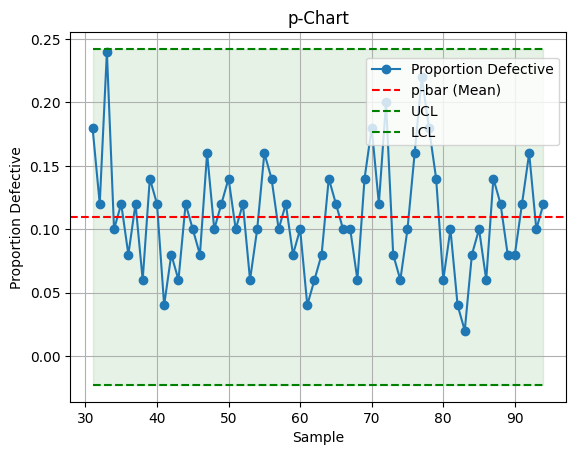

In [10]:
plt.figure()
plt.plot(oj['sample'], oj['proportion'], marker='o', linestyle='-', label='Proportion Defective')
plt.axhline(y=p_bar, color='r', linestyle='--', label='p-bar (Mean)')
plt.plot(oj['sample'], oj['UCL'], color='g', linestyle='--', label='UCL')
plt.plot(oj['sample'], oj['LCL'], color='g', linestyle='--', label='LCL')
plt.fill_between(oj['sample'], oj['LCL'], oj['UCL'], color='g', alpha=0.1)
plt.title('p-Chart')
plt.xlabel('Sample')
plt.ylabel('Proportion Defective')
plt.legend(loc='upper right', bbox_to_anchor=(1, .95))
plt.grid(True)
plt.show()

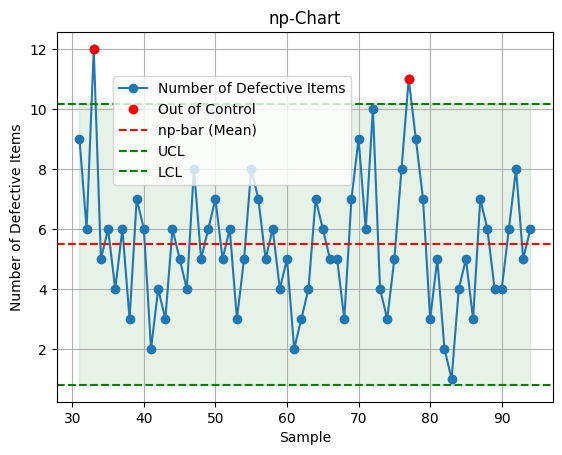

In [12]:
np_bar = oj['D'].mean()
UCL_np = np_bar + 2 * np.sqrt(np_bar)
LCL_np = np_bar - 2 * np.sqrt(np_bar)

plt.figure()
plt.plot(oj['sample'], oj['D'], marker='o', linestyle='-', label='Number of Defective Items')
out_of_control = (oj['D'] > UCL_np) | (oj['D'] < LCL_np)
plt.plot(oj['sample'][out_of_control], oj['D'][out_of_control], marker='o', color='r', linestyle='None', label='Out of Control')
plt.axhline(y=np_bar, color='r', linestyle='--', label='np-bar (Mean)')
plt.axhline(y=UCL_np, color='g', linestyle='--', label='UCL')
plt.axhline(y=LCL_np, color='g', linestyle='--', label='LCL')
plt.fill_between(oj['sample'], LCL_np, UCL_np, color='g', alpha=0.1)
plt.title('np-Chart')
plt.xlabel('Sample')
plt.ylabel('Number of Defective Items')
plt.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()

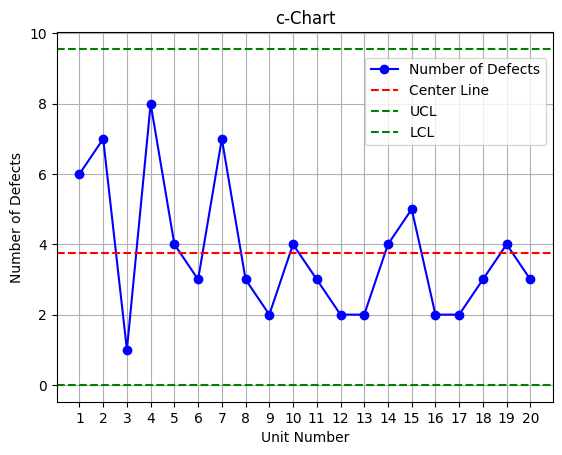

In [13]:
np.random.seed(0)
units=20
defects = np.random.poisson(lam=4, size=units)

c_bar = np.mean(defects)
UCL = c_bar + 3 * np.sqrt(c_bar)
LCL = max(0, c_bar - 3 * np.sqrt(c_bar))

plt.figure()
plt.plot(range(1, units+1), defects, marker='o', linestyle='-', color='b', label='Number of Defects')
plt.axhline(c_bar, color='r', linestyle='--', label='Center Line')
plt.axhline(UCL, color='g', linestyle='--', label='UCL')
plt.axhline(LCL, color='g', linestyle='--', label='LCL')
plt.title('c-Chart')
plt.xlabel('Unit Number')
plt.ylabel('Number of Defects')
plt.xticks(range(1, units+1))
plt.legend(loc='upper right', bbox_to_anchor=(1,0.95))
plt.grid(True)
plt.show()

In [14]:
data = {
    'defect_sequence': np.arange(1, 21),
    'units_between_defects': [50, 30, 45, 60, 55, 35, 40,
                              70, 65, 80, 75, 50, 85, 90,
                              95, 60, 55, 100, 105, 110]
}
df = pd.DataFrame(data)

In [15]:
g_bar = df['units_between_defects'].mean()
UCL = g_bar + 3 * np.sqrt(g_bar * (g_bar + 1))
LCL = max(g_bar - 3 * np.sqrt(g_bar * (g_bar + 1)),0)

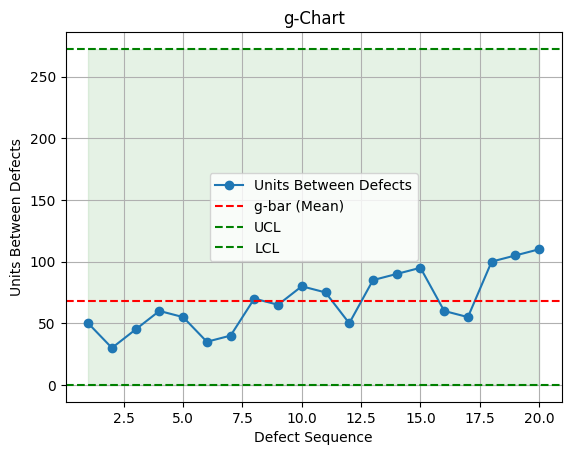

In [16]:
plt.figure()
plt.plot(df['defect_sequence'], df['units_between_defects'], marker='o', linestyle='-', label='Units Between Defects')
plt.axhline(y=g_bar, color='r', linestyle='--', label='g-bar (Mean)')
plt.axhline(y=UCL, color='g', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')
plt.fill_between(df['defect_sequence'], LCL, UCL, color='g', alpha=0.1)
plt.title('g-Chart')
plt.xlabel('Defect Sequence')
plt.ylabel('Units Between Defects')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
pistons = pd.read_csv('./data/pistonrings.csv', usecols=[1,2])
print(pistons.info())
pistons['sample'].value_counts()
print(pistons.head(10))
print(pistons.tail())
stats = pistons['diameter'].describe()
print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  200 non-null    float64
 1   sample    200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.3 KB
None
   diameter  sample
0    74.030       1
1    74.002       1
2    74.019       1
3    73.992       1
4    74.008       1
5    73.995       2
6    73.992       2
7    74.001       2
8    74.011       2
9    74.004       2
     diameter  sample
195    74.010      40
196    74.005      40
197    74.029      40
198    74.000      40
199    74.020      40
count    200.000000
mean      74.003605
std        0.011417
min       73.967000
25%       73.995000
50%       74.003000
75%       74.010000
max       74.036000
Name: diameter, dtype: float64


In [19]:
x_bar = pistons.groupby('sample')['diameter'].mean()
overall_mean = x_bar.mean()
sigma_x_bar = x_bar.std() / np.sqrt(len(x_bar))
UCL = overall_mean + 3 * sigma_x_bar
LCL = overall_mean - 3 * sigma_x_bar

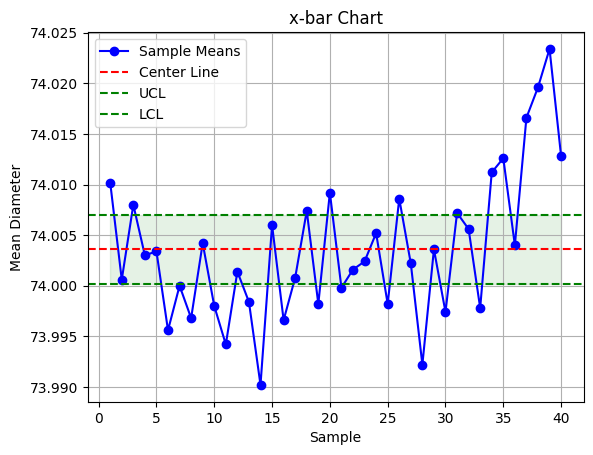

In [20]:
plt.figure()
plt.plot(x_bar.index, x_bar.values, marker='o', linestyle='-', color='b', label='Sample Means')
plt.axhline(overall_mean, color='r', linestyle='--', label='Center Line')
plt.axhline(y=UCL, color='g', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')
plt.fill_between(pistons['sample'], LCL, UCL, color='g', alpha=0.1)
plt.title('x-bar Chart')
plt.xlabel('Sample')
plt.ylabel('Mean Diameter')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [21]:
r_values = pistons.groupby('sample')['diameter'].apply(lambda x: x.max() - x.min())
r_bar = r_values.mean()
sigma_r = r_values.std()
UCL = r_bar + 3 * sigma_r
LCL = max(r_bar - 3 * sigma_r, 0)

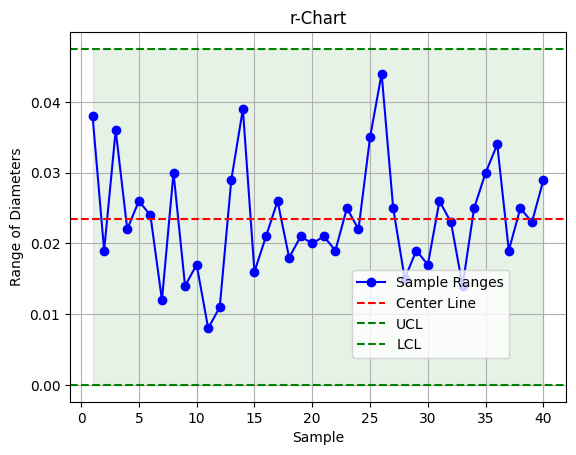

In [22]:
plt.figure()
plt.plot(r_values.index, r_values.values, marker='o', linestyle='-', color='b', label='Sample Ranges')
plt.axhline(r_bar, color='r', linestyle='--', label='Center Line')
plt.axhline(y=UCL, color='g', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')
plt.fill_between(r_values.index, LCL, UCL, color='g', alpha=0.1)
plt.title('r-Chart')
plt.xlabel('Sample')
plt.ylabel('Range of Diameters')
plt.legend(loc='lower right', bbox_to_anchor=(0.9, 0.1))
plt.grid(True)
plt.show()

In [24]:
s = pistons.groupby('sample')['diameter'].std()
s_bar = s.mean()
c4 = np.sqrt(2 / (len(s) - 1))
UCL = s_bar + 3 * (s_bar / c4)
LCL = s_bar - 3 * (s_bar / c4)

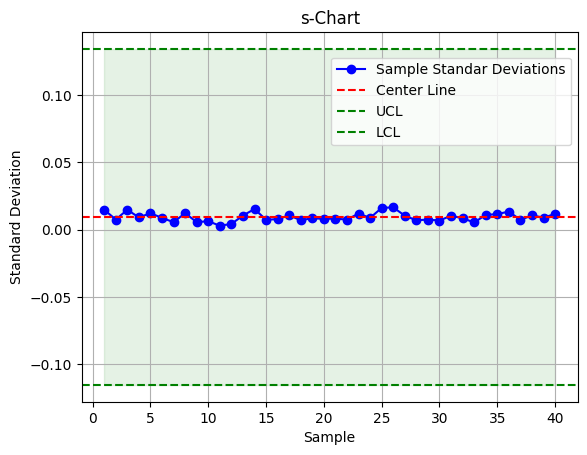

In [ ]:
plt.figure()
plt.plot(s.index, s.values, marker='o', linestyle='-', color='b', label='Sample Standard Deviations')
plt.axhline(s_bar, color='r', linestyle='--', label='Center Line')
plt.axhline(y=UCL, color='g', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')
plt.fill_between(s.index, LCL, UCL, color='g', alpha=0.1)
plt.title('s-Chart')
plt.xlabel('Sample')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
plt.grid(True)
plt.show()

In [28]:
individuals = pistons['diameter']
moving_range = individuals.diff().abs()

I_bar = individuals.mean()
MR_bar = moving_range[1:].mean()

UCL_I = I_bar + 3 * individuals.std()
LCL_I = I_bar - 3 * individuals.std()

D4 = 3.267
D3 = 0
UCL_MR = D4 * MR_bar
LCL_MR = D3 * MR_bar

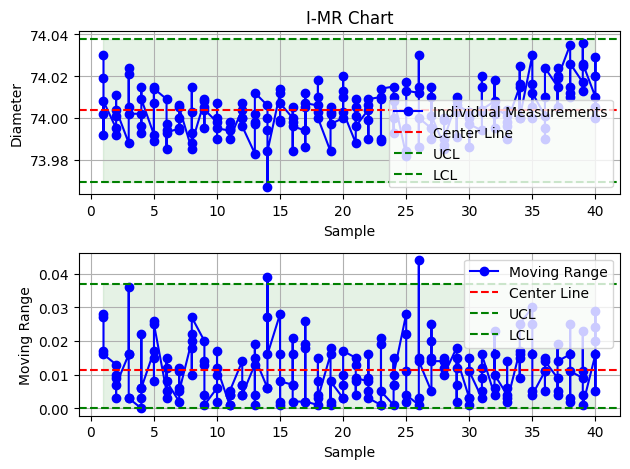

In [29]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(pistons['sample'], individuals, marker='o', linestyle='-', color='b', label='Individual Measurements')
plt.axhline(I_bar, color='r', linestyle='--', label='Center Line')
plt.axhline(y=UCL_I, color='g', linestyle='--', label='UCL')
plt.axhline(y=LCL_I, color='g', linestyle='--', label='LCL')
plt.fill_between(pistons['sample'], LCL_I, UCL_I, color='g', alpha=0.1)
plt.title('I-MR Chart')
plt.xlabel('Sample')
plt.ylabel('Diameter')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(pistons['sample'][1:], moving_range[1:], marker = 'o', linestyle = '-', color = 'b', label = 'Moving Range')
plt.axhline(MR_bar, color = 'r', linestyle = '--', label = 'Center Line')
plt.axhline(UCL_MR, color = 'g', linestyle = '--', label = 'UCL')
plt.axhline(LCL_MR, color = 'g', linestyle = '--', label = 'LCL')
plt.fill_between(pistons['sample'][1:], LCL_MR, UCL_MR, color = 'g', alpha = 0.1)
plt.xlabel('Sample')
plt.ylabel('Moving Range')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.tight_layout()

plt.show()

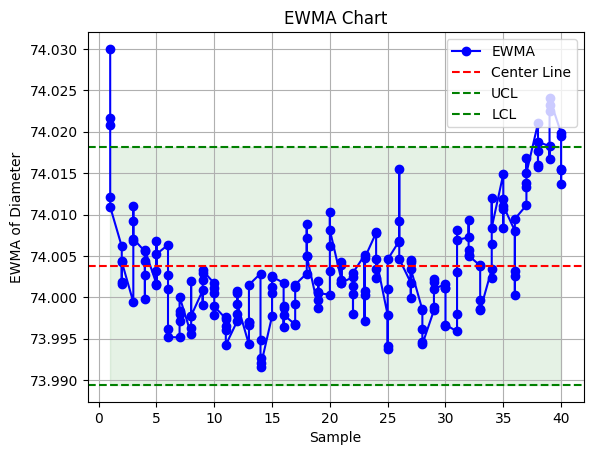

In [30]:
lambda_ = 0.3
n = len(pistons)

ewma = np.zeros(n)
ewma[0] = pistons['diameter'][0]

for i in range(1, n):
    ewma[i] = lambda_ * pistons['diameter'][i] + (1 - lambda_) * ewma[i -1]

ewma_center = np.mean(ewma)
sigma = np.std(pistons['diameter'])
UCL_ewma = ewma_center + 3 * sigma * np.sqrt(lambda_ / (2 - lambda_))
LCL_ewma = ewma_center - 3 * sigma * np.sqrt(lambda_ / (2 - lambda_))

plt.figure()
plt.plot(pistons['sample'], ewma, marker = 'o', linestyle = '-', color = 'b', label = 'EWMA')
plt.axhline(ewma_center, color = 'r', linestyle = '--', label = 'Center Line')
plt.axhline(UCL_ewma, color='g', linestyle='--', label = 'UCL')
plt.axhline(LCL_ewma, color='g', linestyle='--', label = 'LCL')
plt.fill_between(pistons['sample'], LCL_ewma, UCL_ewma, color = 'g', alpha = 0.1)
plt.title('EWMA Chart')
plt.xlabel('Sample')
plt.ylabel('EWMA of Diameter')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()